In [22]:
from random import random
from matplotlib import pyplot
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from numpy import array
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [23]:
# generate a rectangle with random width and height
def random_rectangle():
    
    width, height = random(), random()
    points = list()
    # bottom left
    points.append([0.0, 0.0])
    # bottom right
    points.append([width, 0.0])
    # top right
    points.append([width, height])
    # top left
    points.append([0.0, height])
    
    return points

rect = random_rectangle()
print(rect)

[[0.0, 0.0], [0.009855166471589016, 0.0], [0.009855166471589016, 0.048866581898044936], [0.0, 0.048866581898044936]]


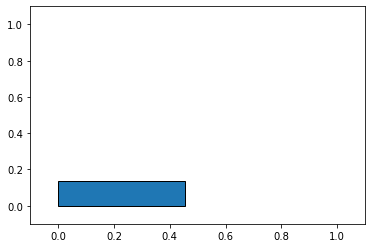

In [24]:
# plot a rectangle
def plot_rectangle(rect):
    # close the rectangle path
    rect.append(rect[0])
    # define path
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path = Path(rect, codes)
    axis = pyplot.gca()
    patch = PathPatch(path)
    
    # add shape to plot
    axis.add_patch(patch)
    axis.set_xlim(-0.1,1.1)
    axis.set_ylim(-0.1,1.1)
    pyplot.show()
    
rect = random_rectangle()
plot_rectangle(rect)

In [25]:
# generate input and output sequences for one random rectangle
def get_samples():
    # generate rectangle
    rect = random_rectangle()
    X, y = list(), list()
    # create input output pairs for each coordinate
    for i in range(1, len(rect)):
        X.append(rect[i-1])
        y.append(rect[i])
    # convert input sequence shape to have 1 time step and 2 features
    X, y = array(X), array(y)
    X = X.reshape((X.shape[0], 1, 2))
    return X, y
get_samples()

(array([[[0.        , 0.        ]],
 
        [[0.41507463, 0.        ]],
 
        [[0.41507463, 0.66138505]]]),
 array([[0.41507463, 0.        ],
        [0.41507463, 0.66138505],
        [0.        , 0.66138505]]))

In [26]:
# use a fit LSTM model to generate a new rectangle from scratch
def generate_rectangle(model):
    rect = list()
    # use [0,0] to seed the generation process
    last = array([0.0,0.0]).reshape((1, 1, 2))
    rect.append([[y for y in x] for x in last[0]][0])
    # generate the remaining 3 coordinates
    for i in range(3):
        # predict the next coordinate
        yhat = model.predict(last, verbose=0)
        # use this output as input for the next prediction
        last = yhat.reshape((1, 1, 2))
        # store coordinate
        rect.append([[y for y in x] for x in last[0]][0])
        return rect

In [27]:
X, y = get_samples()
for i in range(X.shape[0]):
    print(X[i][0], "=>" , y[i])

[0. 0.] => [0.42457186 0.        ]
[0.42457186 0.        ] => [0.42457186 0.53356925]
[0.42457186 0.53356925] => [0.         0.53356925]


In [28]:
# define model
model = Sequential()
model.add(LSTM(10, input_shape=(1, 2)))
model.add(Dense(2, activation= 'linear' ))
model.compile(loss= 'mae' , optimizer= 'adam' )
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# fit model
for i in range(250):
    X, y = get_samples()
    model.fit(X, y, epochs=1, verbose=1, shuffle=False)

1/1 [==============================] - 0s 3ms/step - loss: 0.2116


1/1 [==============================] - 0s 993us/step - loss: 0.1817


1/1 [==============================] - 0s 1ms/step - loss: 0.2550


In [30]:
# generate new shapes from scratch
rect = generate_rectangle(model)
plot_rectangle(rect)

ValueError: 'codes' must be a 1D list or array with the same length of 'vertices'

In [32]:
# use [0,0] to seed the generation process
last = array([0.0,0.0]).reshape((1, 1, 2))
# predict the next coordinate
yhat = model.predict(last, verbose=0)
# use this output as input for the next prediction
last = yhat.reshape((1, 1, 2))
# predict the next coordinate
yhat = model.predict(last, verbose=0)
